In [1]:

# import libraries
import numpy as np
import pandas as pd
from pprint import pprint as pp
import string
import seaborn as sns;sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

Project Task 1 


In [2]:
# 1. import the dataframe
df = pd.read_csv(r"D:\DataScience_Masters program doc\Course 6_Data Science Capstone\Project 2\Healthcare - Diabetes\health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# checking the data type  of the varialbles 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 1. Perform descriptive analysis.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Detecting missing values 
 
 # We can see from the above result there are columns that have a minimum value of zero (0). 
# For columns: Glucose,BloodPressure,SkinThickness,Insulin and BMI a value of zero does not make sense and indicates an invalid or missing value.

# count the number of missing values for each column

from numpy import nan
df['Glucose'] = df['Glucose'].replace(0, nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, nan)
df['Insulin'] = df['Insulin'].replace(0, nan)
df['BMI'] = df['BMI'].replace(0, nan)


In [6]:
# number of missing values 

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Lets check the dataset is filled with the na values 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


As you can see in the above distribution  greter number of  “missing value” is found in the dataset. Hence, different strategies may be needed for different columns to ensure that there are still a sufficient number of records left to train a predictive model.

Therefore, Before handling missing values, let’s first demonstrate that “missing value” in a dataset can cause problems by seeing the distribution of the missied value columns using the historgram function.

2. Visually explore these variables using histograms. Treat the missing values accordingly.

<AxesSubplot:>

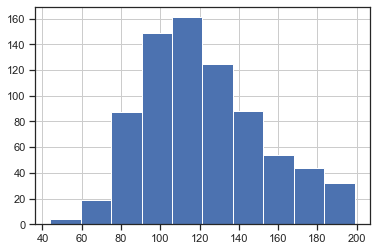

In [8]:
df.Glucose.hist()

<AxesSubplot:>

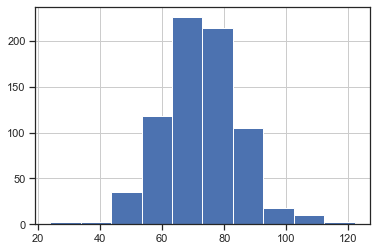

In [9]:
df.BloodPressure.hist()

<AxesSubplot:>

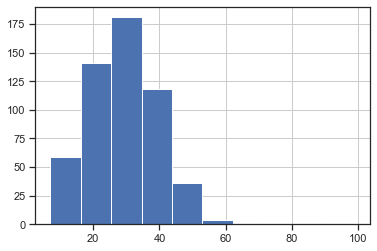

In [10]:
df.SkinThickness.hist()

<AxesSubplot:>

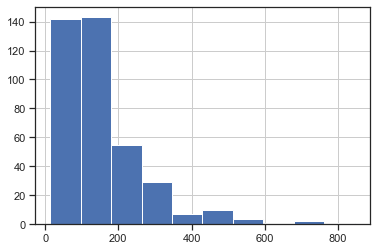

In [11]:
df.Insulin.hist()

<AxesSubplot:>

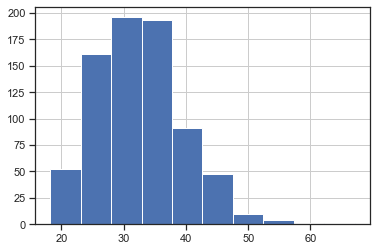

In [12]:
df.BMI.hist()

As we can see in the above dataset distirbution of the "missing value" columns having not much skewed or normal distirbution or less number of missing value like Glucose,BloodPressure and BMI will be handled by mean of the variable and for the other variables having a skewed distribution the missing values will be handeled by median. 

In [13]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)


In [14]:
# checking the missied columns are replaced by mean and median
df['BloodPressure'].mean()

72.40518417462486

In [15]:
df['SkinThickness'].median()

29.0

In [16]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.600000,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.600000,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.300000,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.100000,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.600000,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.000000,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.300000,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.457464,0.232,54,1


In [17]:
# checking missing values are handled 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

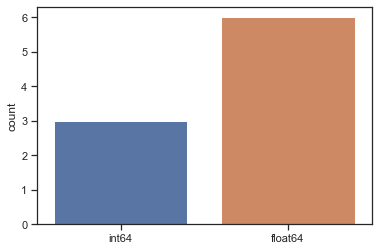

In [18]:
sns.countplot(df.dtypes.map(str))
plt.show()

 Project Task:2

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [19]:
Counts=df['Outcome'].value_counts()
Counts

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
Percent=df['Outcome'].value_counts(normalize = True)
Percent

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [21]:
Percent100=df['Outcome'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
Percent100

0    65.1%
1    34.9%
Name: Outcome, dtype: object

In [22]:
pd.DataFrame({'Counts':Counts , 'per':Percent , 'per100':Percent100})

,Counts,per,per100
0,500,0.651042,65.1%
1,268,0.348958,34.9%


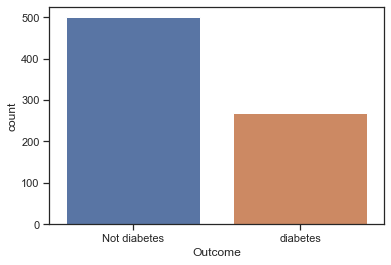

In [23]:
diabetes = sns.countplot(df['Outcome'])
diabetes.set_xticklabels(['Not diabetes','diabetes'])
plt.show()

You can clearly see that there is a huge difference between the outcome variable. 500 Not diabetes and 268 with diabetes.
Therefore, Imbalance data can hamper our model accuracy and high error.
In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

There is no short answer to the question if an undersampling or oversampling method is better for imbalanced data, even more so on.However, most researches have pointed out that undersampling in most cases does produce better results than oversampling.

The common argument is that undersampling is generally “cheaper” than oversampling and since the class of interest (Diabetes) is the minority positive class, reducing some information of the majority negative class is acceptable. 

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings

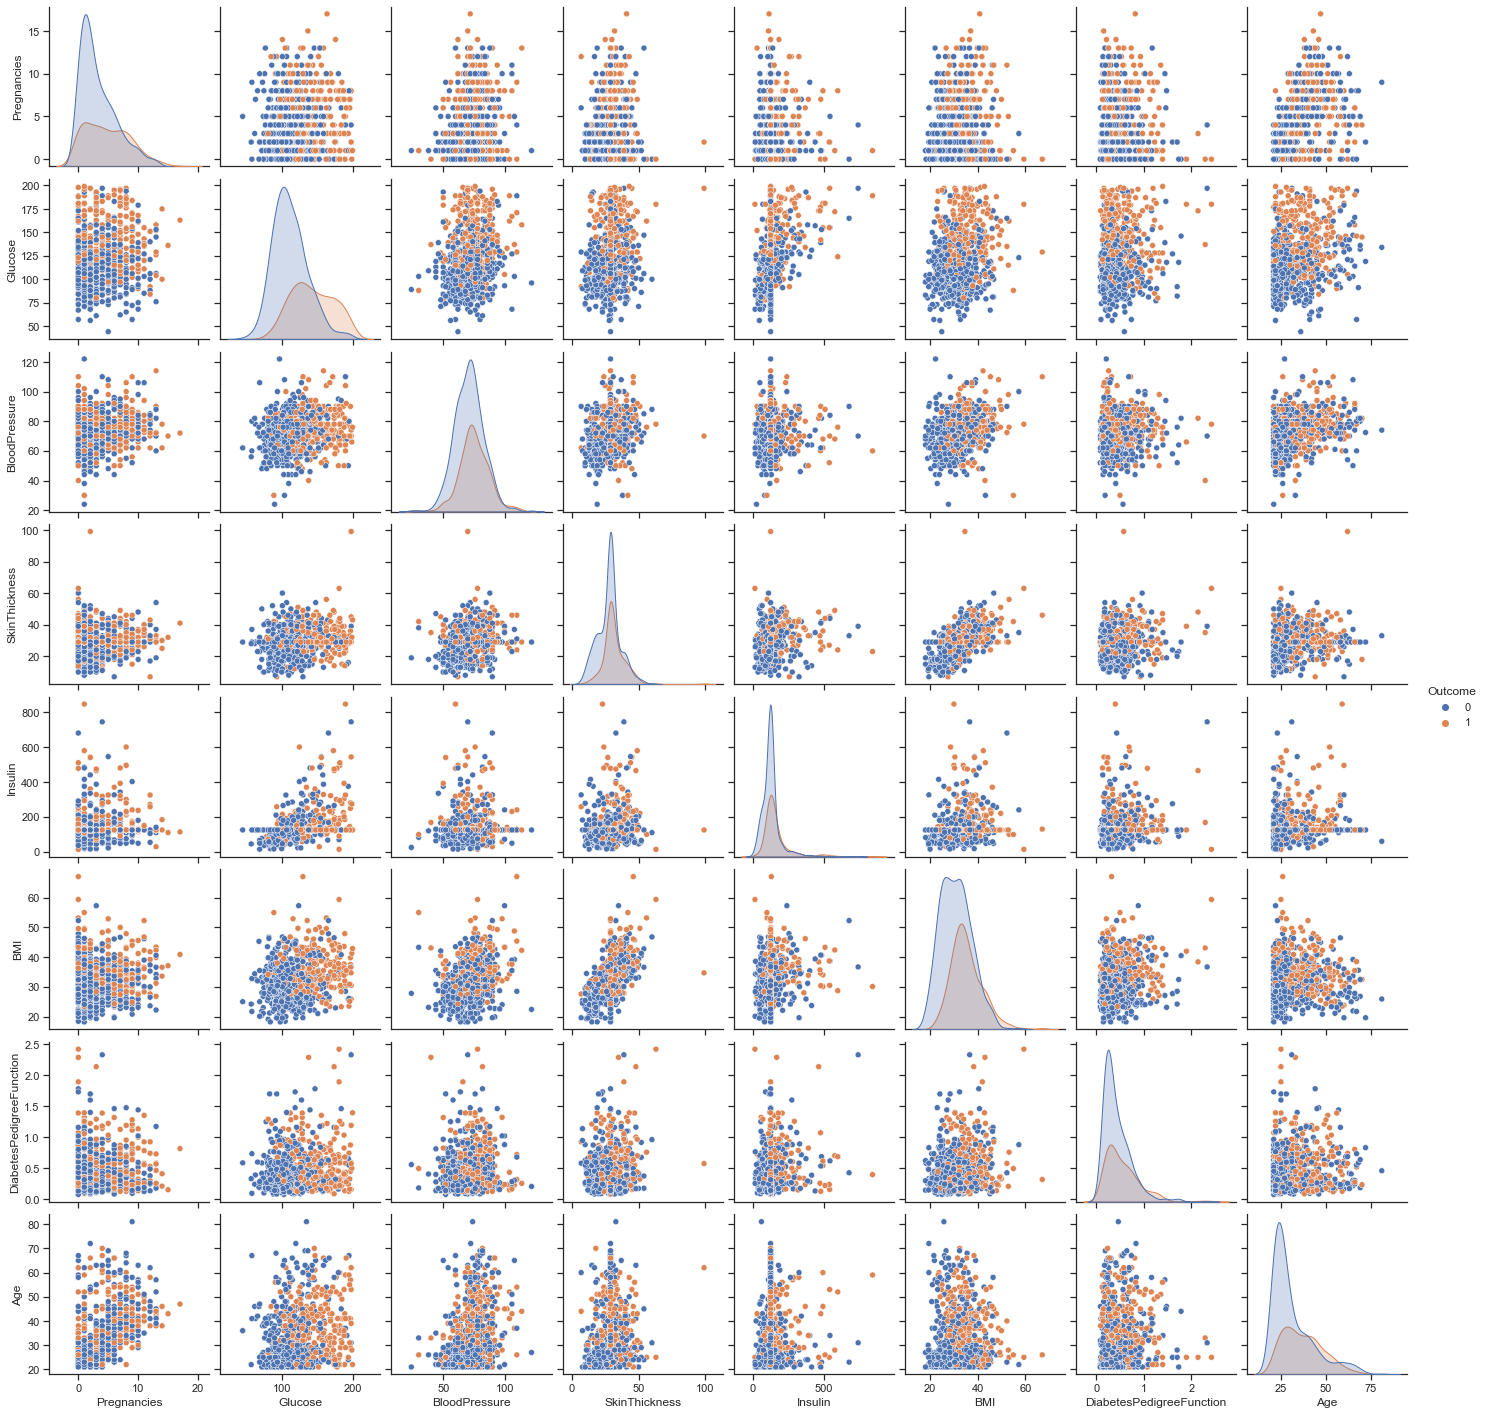

In [24]:
sns.pairplot(df, hue = 'Outcome')

As we can see in the above scatter charts;
We see that  BMI is positively correlated with inceresing Skin thinkness,BloodPressure, Insulin level and Diabetes Pedigree Function and also tends to increase the occurance of diabetics. This means having a greater numeber of BMI  tends to have high level of Skin thinkness,BloodPressure, Insulin level and Diabetes Pedigree Function and ofcourse may have a contirbution for beeing diabetic (although this of course does not prove that one causes the other). 

The other finding is that as the age increases a positive coorrelation with the the occurance of diabets. 

2. Perform correlation analysis. Visually explore it using a heat map.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021565  0.230941       0.281268       0.543162   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021565                 -0.033523   
Glucose                   0.419064  0.230

<AxesSubplot:>

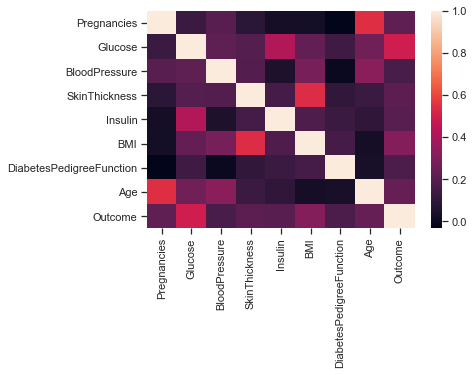

In [25]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In this heatmap above, the values that are closest to the light orange color represent stronger positive correlations. Those closer to the deep purple represent stronger negative correlations. 

Project Task:3

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Before using validation techniques we  deal with Imbalanced Classes  using Undersampling  by removing some observations of the majority class. This is done until the majority and minority class is balanced out. 

In [26]:
#Separating the Outcome that will be 0 and  1.

# Outcome count
Outcome_count_0, Outcome_count_1 = df['Outcome'].value_counts()

# Separate Outcome

Outcome_0 = df[df['Outcome'] == 0]
Outcome_1 = df[df['Outcome'] == 1]

# print the shape of the Outcome

print('Outcome 0:', Outcome_0.shape)
print('Outcome 1:', Outcome_1.shape)


Outcome 0: (500, 9)
Outcome 1: (268, 9)


total class of 1 and 0: 0    268
1    268
Name: Outcome, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

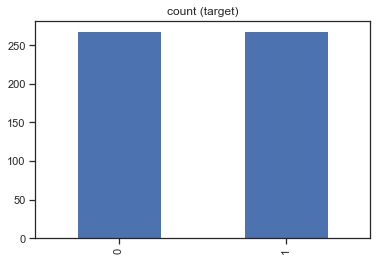

In [27]:
Outcome_0_under = Outcome_0.sample(Outcome_count_1)

df_test_under = pd.concat([Outcome_0_under, Outcome_1], axis=0)

print("total class of 1 and 0:",df_test_under['Outcome'].value_counts()) 

# plot the count after under-sampeling

df_test_under['Outcome'].value_counts().plot(kind='bar', title='count (target)')

In [28]:
# Check the shape of the dataset 
print('Shape of the Dataframe after using under sampling to deal with Imbalanced Classes:', df_test_under.shape)


Shape of the Dataframe after using under sampling to deal with Imbalanced Classes: (536, 9)


Inorder to have the confidence that the trained model will generalize well on the unseen data we will check implementation of several validation techniques, mentioned below: 
1. Hold Out Validation-Train and Test Set Split
2. K-fold Cross-Validation.
3. Stratified K-fold Cross-Validation
4. Leave One Out Cross-Validation.
5. Repeated Random Test-Train Splits


Since the outcome variable is catagorical we use the Logistic Regression Model for the perdicition and comapring the accuracy of validation techniques.

In [29]:
# Creating Arrays for the Features and the Outcome Variable
x1 = df_test_under.drop('Outcome', axis=1).values 
y1 = df_test_under['Outcome'].values

1. Holdout Validation Approach - Train and Test Set Split
The training data is used to train the model while the unseen data is used to validate the model performance. The common split ratio used is  70:30.

In [30]:
# import the necessary modules
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [31]:
# splits the data into the training and the test data

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=100)

# instantiate the LogisticRegression() model

model = LogisticRegression()

#  fit the model on the training data

model.fit(X_train, Y_train)

# use the trained model to generate Accuracy scores on the test data

result = model.score(X_test, Y_test)

# print the accuracy result.

print("Holdout Validation Approach Accuracy Score: %.2f%%" % (result*100.0))

Holdout Validation Approach Accuracy Score: 76.40%


2. K-fold Cross-Validation.
In k-fold cross-validation, the data is divided into k folds. The model is trained on k-1 folds with one fold held back for testing. This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviation.
We will use 10-fold cross-validation for our problem statement.

In [32]:
# import the necessary modules
from sklearn.model_selection import KFold

# creates 10 folds.
kfold = model_selection.KFold(n_splits=10, random_state=None)

# instantiate the LogisticRegression() model

model_kfold = LogisticRegression()

# fits the model and generates cross-validation scores

results_kfold = model_selection.cross_val_score(model_kfold, x1, y1, cv=kfold)

# prints the mean accuracy result.

print("K-fold Cross-Validation Accuracy Score: %.2f%%" % (results_kfold.mean()*100.0)) 


K-fold Cross-Validation Accuracy Score: 65.86%


3. Stratified K-fold Cross-Validation - is a variation of k-fold cross-validation that returns stratified folds.

In [33]:
# import the necessary modules
from sklearn.model_selection import StratifiedKFold

# creates the Stratified KFolds

skfold = StratifiedKFold(n_splits=3, random_state=None)

# instantiate the LogisticRegression() model

model_skfold = LogisticRegression()

# fits the model and generates cross-validation scores

results_skfold = model_selection.cross_val_score(model_skfold, x1, y1, cv=skfold)

# prints the mean accuracy result.

print("Stratified K-fold Cross-Validation Accuracy Score: %.2f%%" % (results_skfold.mean()*100.0)) 


Stratified K-fold Cross-Validation Accuracy Score: 72.21%


4. Leave One Out Cross-Validation(LOOCV) - This variation is useful since the training data is of limited size and the number of parameters to be tested is not high.

In [34]:
# import the necessary modules
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

# creates the leave-one-out cross-validation 

loocv = model_selection.LeaveOneOut()

# instantiate the LogisticRegression() model

model_loocv = LogisticRegression()

# fits the model and generates cross-validation scores

results_loocv = model_selection.cross_val_score(model_loocv, x1, y1, cv=loocv)

# prints the mean accuracy result.

print("Leave One Out Cross-Validation Accuracy Score: %.2f%%" % (results_loocv.mean()*100.0))


Leave One Out Cross-Validation Accuracy Score: 73.13%


In [35]:
# The mean accuracy result for the various techniques is summarised below:

print("Holdout Validation Approach Accuracy Score: %.2f%%" % (result*100.0))
print("K-fold Cross-Validation Accuracy Score: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Stratified K-fold Cross-Validation Accuracy Score: %.2f%%" % (results_skfold.mean()*100.0)) 
print("Leave One Out Cross-Validation Accuracy Score: %.2f%%" % (results_loocv.mean()*100.0))

Holdout Validation Approach Accuracy Score: 76.40%
K-fold Cross-Validation Accuracy Score: 65.86%
Stratified K-fold Cross-Validation Accuracy Score: 72.21%
Leave One Out Cross-Validation Accuracy Score: 73.13%


We can conclude that the Holdout Validation Approach improves the performance of the model and is a better model validation strategy.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Since the Holdout Validation Approach has greater accuracy score we used to evaluate each algorithm, to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [37]:

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [38]:
# evaluate each model for algorithm comparison
results = []
names = []

for name, model in models:
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=100)
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    results.append(result)
    names.append(name)
    msg = "%s: %f " % (name, result)
    print(msg)

LR: 0.763975 
LDA: 0.751553 
KNN: 0.701863 
CART: 0.695652 
NB: 0.732919 
SVM: 0.732919 


As you can see in the above results, Logistic regaration has a great accuracy score of 77% and its a best peridictive model 

Project Task: 4

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [39]:
# splits the data into the training and the test data

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x1, y1, test_size=0.30, random_state=100)


# instantiate the necessary libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# instantiate the LogisticRegression() model

model = LogisticRegression()

#  fit the model on the training data

model.fit(X_train, Y_train)


# predict the attrition on the test data
y_pred_full = model.predict(X_test)


In [40]:
# print the classification report
print(classification_report(Y_test, y_pred_full))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        86
           1       0.73      0.77      0.75        75

    accuracy                           0.76       161
   macro avg       0.76      0.76      0.76       161
weighted avg       0.77      0.76      0.76       161



In the above classification report,

1. Sensitivity or recall is the ratio of correct positive predictions (diabetes) to the total no. of positive predictions. Or more simply, how sensitive the classifier is for detecting positive instances.Therefore, the model have 76% sensitive to detect the diabetics


2. Specificity is the ratio of correct negative predictions (not diabetic) to the total no. of negative predictions. This determines how specific the classifier is in predicting positive instances.Therefore, the model have 78% Specificity to detect the none diabetics


3. Precision is the ratio of correct predictions to the total no. of predicted correct predictions(diabates). Therefore, the Precision of model to detect diabates is   75% 

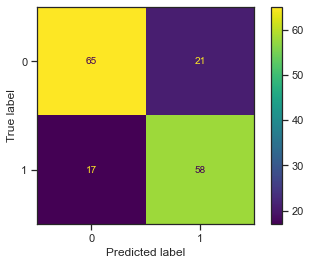

In [41]:
plot_confusion_matrix(model, X_test, Y_test)

In [42]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_full)


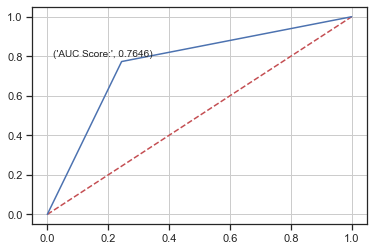

In [43]:
# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(Y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)

In [44]:
roc_auc_score(Y_test, y_pred_full)

0.7645736434108528

AUC Score of 0.7695 showed in the above graph tells that , there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values.

                           End of analysis part of the project  

In [61]:
# Exporting the cleaned dataset for the data visualization on tabealu
df.to_excel(r'D:\DataScience_Masters program doc\Course 6_Data Science Capstone\Project 2\Healthcare - Diabetes\health care diabetes_cleaned.xlsx', index = False)

Please check the tabealu public for the visulaization section 